In [2]:
import math as m
import numpy as np
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [3]:
class Sparrow:
    def __init__(
        self, 
        u1: np.array(float),
        u2: np.array(float),
        u3: np.array(float),
        f: float
             ):
        self.u1 = u1
        self.u2 = u2
        self.u3 = u3
        self.f = f
        
class SparrowSwarm:
    def __init__(
        self,
        swarm_size: int,
        dim: int,
        m_capacity: float,
        max_loop_number: float,
        search_time: float,
        fragment: float,
        intensity_process: float,
        leader_step: float,
        reduction: float,
        recovery: float,
        levi_parameter: float,
        c1: float,
        c2: float,
        c3: float,
        min_area: float,
        func_num: int,
                 ):
        self.swarm_size = swarm_size
        self.dim = dim
        self.u_dim = dim-1
        self.m_capacity = m_capacity
        self.max_loop_number = max_loop_number
        self.search_time = search_time
        self.fragment = fragment
        self.step_integration = search_time / fragment
        self.intensity_process = intensity_process
        self.leader_step = leader_step
        self.reduction = reduction
        self.recovery = recovery
        self.levi_parameter = levi_parameter
        self.area_radius = 0
        self.c1 = c1
        self.c2 = c2
        self.c3 = c3
        self.min_area = min_area
        self.rk = 1
        
        
        self.current_iter = 0
        
        self.exact = 0
        self.function_name = ''
        self.func_num = func_num
        
        self.population = []
        self.memory = []
        self.pool = []
        
        self.vector_f1 = []
        self.vector_f2 = []
        self.vector_f3 = []
        
        self.vector_sigma1 = []
        self.vector_sigma2 = []
        self.vector_sigma3 = []
        
        self.best_all_iters = []
        
        self.best_leaders = []
        
        self.best_local = []
        self.best_local_1 = []
        self.best_local_2 = []
        self.best_local_3 = []

        self.euclid_list_1 = []
        self.euclid_list_2 = []
        self.euclid_list_3 = []
        
        self.area_new_1 = []
        self.area_new_2 = []
        self.area_new_3 = []
        
        self.best_x1 = []
        self.best_x2 = []
        self.best_x3 = []
        

        
    def init_area(self, control):
        self.area_1 = [np.array([0, 4]) for i in range(self.u_dim)]
        self.area_2 = [np.array([0, 4]) for i in range(self.u_dim)]
        self.area_3 = [np.array([0, 0.5]) for i in range(self.u_dim)]
        self.area_new_1 = deepcopy(self.area_1)
        self.area_new_2 = deepcopy(self.area_2)
        self.area_new_3 = deepcopy(self.area_3)
        self.exact = control.ExactI()

        
        
    def form_first_pop(self, control):
        self.population.clear()
        for i in range(self.swarm_size):
            coordinate_1 = np.array([np.random.rand() * (self.area_1[j][1] - self.area_1[j][0]) + self.area_1[j][0] \
                          for j in range(self.u_dim)])
            coordinate_2 = np.array([np.random.rand() * (self.area_2[j][1] - self.area_2[j][0]) + self.area_2[j][0] \
                          for j in range(self.u_dim)])
            coordinate_3 = np.array([np.random.rand() * (self.area_3[j][1] - self.area_3[j][0]) + self.area_3[j][0] \
                          for j in range(self.u_dim)])

            sparrow = Sparrow(coordinate_1, coordinate_2, coordinate_3, 0)
            self.population.append(sparrow)
            
            
    # best in abs x_j_best
    def find_best_all_iters(self, loop_id):
        if loop_id == 0:
            #self.best_all_iters.append(deepcopy(self.population)[1:])
            for i in range(1, self.swarm_size):
                self.best_all_iters.append(Sparrow(deepcopy(self.population[i].u1), deepcopy(self.population[i].u2),\
                                                   deepcopy(self.population[i].u3), self.population[i].f))
                
        else:
            for i in range(1, self.swarm_size):
                if self.best_all_iters[i].f > self.population[i].f:
                #if self.best_all_iters[i].f < self.population[i].f:
                    self.best_all_iters[i].f = self.population[i].f
                    self.best_all_iters[i].u1 = deepcopy(self.population[i].u1)
                    self.best_all_iters[i].u2 = deepcopy(self.population[i].u2)
                    self.best_all_iters[i].u3 = deepcopy(self.population[i].u3)
                    
                                                   
        #return max(self.best_leaders, key=lambda sparrow: sparrow.f)
    
    
    # best in pop x_best
    def find_leader(self):
        #return max(self.population, key=lambda sparrow: sparrow.f)
        return min(self.population, key=lambda sparrow: sparrow.f)
    
    
    # best local x_j_local
    # ПОДУМАТЬ НАД РЕАЛИЗАЦИЕЙ
#     def find_best_local(self, leader_index):
#         self.best_local_1.clear()
#         self.best_local_2.clear()
#         self.best_local_3.clear()
#         for i in range(self.swarm_size):
#             if i != leader_index:
#                 sparrow1 = Sparrow(deepcopy(self.population[i].u1), deepcopy(self.population[i].u2),\
#                                   deepcopy(self.population[i].u3), self.population[i].f)
#                 sparrow2 = deepcopy(sparrow1)
#                 sparrow3 = deepcopy(sparrow1)
#                 for j in range(self.swarm_size):
#                     if i!= j:
#                         if np.linalg.norm(np.array(self.population[j].u1) - np.array(self.population[i].u1)) <= self.area_radius:
#                             if sparrow1.f < self.population[j].f:
#                                 sparrow1.u1 = deepcopy(self.population[j].u1)
#                                 sparrow1.f = self.population[j].f
                        
#                         if np.linalg.norm(np.array(self.population[j].u2) - np.array(self.population[i].u2)) <= self.area_radius:
#                             if sparrow2.f < self.population[j].f:
#                                 sparrow2.u2 = deepcopy(self.population[j].u2)
#                                 sparrow2.f = self.population[j].f
                        
#                         if np.linalg.norm(np.array(self.population[j].u3) - np.array(self.population[i].u3)) <= self.area_radius:
#                             if sparrow3.f < self.population[j].f:
#                                 sparrow3.u3 = deepcopy(self.population[j].u3)
#                                 sparrow3.f = self.population[j].f
#                 self.best_local_1.append(sparrow1)
#                 self.best_local_2.append(sparrow2)
#                 self.best_local_3.append(sparrow3)
      
    def find_best_local(self, leader_index):
        self.best_local.clear()
        
        for i in range(self.swarm_size):
            if i != leader_index:
                sparrow = Sparrow(deepcopy(self.population[i].u1), deepcopy(self.population[i].u2),\
                                  deepcopy(self.population[i].u3), self.population[i].f)
                for j in range(self.swarm_size):
                    if i!= j:
                        if (np.linalg.norm(np.array(self.population[j].u1) - np.array(self.population[i].u1))) and\
                        (np.linalg.norm(np.array(self.population[j].u2) - np.array(self.population[i].u2))) and\
                        (np.linalg.norm(np.array(self.population[j].u3) - np.array(self.population[i].u3))) <= self.area_radius:
                            if sparrow1.f > self.population[j].f:
                            #if sparrow1.f < self.population[j].f:
                                sparrow1.u1 = deepcopy(self.population[j].u1)
                                sparrow1.u2 = deepcopy(self.population[j].u2)
                                sparrow1.u3 = deepcopy(self.population[j].u3)
                                sparrow1.f = self.population[j].f
                        
                self.best_local.append(sparrow)
        
    
    def calc_f_sigma(self):
        self.vector_f1.clear()
        self.vector_f2.clear()
        self.vector_f3.clear()
        self.vector_sigma1.clear()
        self.vector_sigma2.clear()
        self.vector_sigma3.clear()
        
        for i in range(1, self.swarm_size):
            r1 = np.random.uniform(0, 1)
            r2 = np.random.uniform(0, 1)
            r3 = np.random.uniform(0, 1)
            numb_last = len(self.best_leaders) - 1
            
            best_leaders_curr1 = np.array(self.best_leaders[numb_last].u1) - np.array(self.population[i].u1)
            best_leaders_curr2 = np.array(self.best_leaders[numb_last].u2) - np.array(self.population[i].u2)
            best_leaders_curr3 = np.array(self.best_leaders[numb_last].u3) - np.array(self.population[i].u3)

            best_all_iter_curr1 = np.array(self.best_all_iters[i - 1].u1) - np.array(self.population[i].u1)
            best_all_iter_curr2 = np.array(self.best_all_iters[i - 1].u2) - np.array(self.population[i].u2)
            best_all_iter_curr3 = np.array(self.best_all_iters[i - 1].u3) - np.array(self.population[i].u3)
            
            # тут думаем
            best_loc_curr1 = np.array(self.best_local[i - 1].u1) - np.array(self.population[i].u1)
            best_loc_curr2 = np.array(self.best_local[i - 1].u2) - np.array(self.population[i].u2)
            best_loc_curr3 = np.array(self.best_local[i - 1].u3) - np.array(self.population[i].u3)
            
            tmp_f1 = self.c1 * r1 * best_leaders_curr1
            tmp_f2 = self.c1 * r1 * best_leaders_curr2
            tmp_f3 = self.c1 * r1 * best_leaders_curr3
            
            tmp_sigma1 = self.c2 * r2 * best_all_iter_curr1 + self.c3 * r3 * best_loc_curr1
            tmp_sigma2 = self.c2 * r2 * best_all_iter_curr2 + self.c3 * r3 * best_loc_curr2
            tmp_sigma3 = self.c2 * r2 * best_all_iter_curr3 + self.c3 * r3 * best_loc_curr3
            
            self.vector_f1.append(tmp_f1)
            self.vector_f2.append(tmp_f2)
            self.vector_f3.append(tmp_f3)
            
            self.vector_sigma1.append(tmp_sigma1)
            self.vector_sigma2.append(tmp_sigma2)
            self.vector_sigma3.append(tmp_sigma3)
            
            
    def new_leader_location(self, iter_id):
        sparrow = Sparrow(deepcopy(self.population[0].u1), deepcopy(self.population[0].u2),\
                          deepcopy(self.population[0].u3), self.population[0].f)
#         check_obl_1 = 0
#         check_obl_2 = 0
#         check_obl_3 = 0
        devide = self.swarm_size / 2
        dev_truncated = m.trunc(devide)
        in_while1 = True
        in_while2 = True
        in_while3 = True
        
        for i in range(self.u_dim):
           
            while_counter = 0
            while (in_while1):
                in_while1 = False
                
                rr_1 = np.random.uniform(0, 1) * (self.area_new_1[i][1] - self.area_new_1[i][0]) + self.area_new_1[i][0]
                
                theta_1 = rr_1 * 2 * m.pi
                
                ll_1 = m.pow(abs(rr_1), 1 / self.levi_parameter)
                
                if i < dev_truncated:
                    xi_1 = ll_1 * m.sin(theta_1)
                else:
                    xi_1 = ll_1 * m.cos(theta_1)
                                
                check_obl_1 = self.population[0].u1[i] + (self.leader_step / (iter_id + 1)) * xi_1
                
                if check_obl_1 < self.area_new_1[i][0] or check_obl_1 > self.area_new_1[i][1]:
                    in_while1 = True
                else:
                    in_while1 = False
                
                while_counter += 1
                if while_counter > 20:
                    in_while1 = False
                    
            if while_counter >= 20:
                if check_obl_1 < self.area_new_1[i][0]:
                    sparrow.u1[i] = self.area_new_1[i][0]
                if check_obl_1 > self.area_new_1[i][1]:
                    sparrow.u1[i] = self.area_new_1[i][1]
                    
            sparrow.u1[i] = self.population[0].u1[i] + (self.leader_step / (iter_id + 1)) * xi_1
            
            while_counter = 0
            while (in_while2):
                in_while2 = False
                
                rr_2 = np.random.uniform(0, 1) * (self.area_new_2[i][1] - self.area_new_2[i][0]) + self.area_new_2[i][0]
                
                theta_2 = rr_2 * 2 * m.pi
                
                ll_2 = m.pow(abs(rr_2), 1 / self.levi_parameter)
                
                if i < dev_truncated:
                    xi_2 = ll_2 * m.sin(theta_2)
                else:
                    xi_2 = ll_2 * m.cos(theta_2)
                                
                check_obl_2 = self.population[0].u2[i] + (self.leader_step / (iter_id + 1)) * xi_2
                
                if check_obl_2 < self.area_new_2[i][0] or check_obl_2 > self.area_new_2[i][1]:
                    in_while2 = True
                else:
                    in_while2 = False
                    
                while_counter += 1
                if while_counter > 20:
                    in_while2 = False
                    
            if while_counter >= 20:
                if check_obl_2 < self.area_new_2[i][0]:
                    sparrow.u2[i] = self.area_new_2[i][0]
                if check_obl_2 > self.area_new_2[i][1]:
                    sparrow.u2[i] = self.area_new_2[i][1]
            
            sparrow.u2[i] = self.population[0].u2[i] + (self.leader_step / (iter_id + 1)) * xi_2
            
            while_counter = 0
            while (in_while3):
                in_while3 = False
                
                rr_3 = np.random.uniform(0, 1) * (self.area_new_3[i][1] - self.area_new_3[i][0]) + self.area_new_3[i][0]
                
                theta_3 = rr_3 * 2 * m.pi
                
                ll_3 = m.pow(abs(rr_3), 1 / self.levi_parameter)
                
                if i < dev_truncated:
                    xi_3 = ll_3 * m.sin(theta_3)
                else:
                    xi_3 = ll_3 * m.cos(theta_3)
                
                check_obl_3 = self.population[0].u3[i] + (self.leader_step / (iter_id + 1)) * xi_3
                
                if check_obl_3 < self.area_new_3[i][0] or check_obl_3 > self.area_new_3[i][1]:
                    in_while3 = True
                else:
                    in_while3 = False
                while_counter += 1
                if while_counter > 20:
                    in_while3 = False
                    
            if while_counter >= 20:
                if check_obl_3 < self.area_new_3[i][0]:
                    sparrow.u3[i] = self.area_new_3[i][0]
                if check_obl_3 > self.area_new_3[i][1]:
                    sparrow.u3[i] = self.area_new_3[i][1]
                    
            sparrow.u3[i] = self.population[0].u3[i] + (self.leader_step / (iter_id + 1)) * xi_3
            
        self.population[0].u1 = deepcopy(sparrow.u1)
        self.population[0].u2 = deepcopy(sparrow.u2)
        self.population[0].u3 = deepcopy(sparrow.u3)
                    

    
    def new_swarm_location(self, rk):
        
        for i in range(self.u_dim):
            self.area_new_1[i][0] = self.population[0].u1[i] - rk * (self.area_1[i][1] - self.area_1[i][0]) * 0.5
            self.area_new_1[i][1] = self.population[0].u1[i] + rk * (self.area_1[i][1] - self.area_1[i][0]) * 0.5
            
            self.area_new_2[i][0] = self.population[0].u2[i] - rk * (self.area_2[i][1] - self.area_2[i][0]) * 0.5
            self.area_new_2[i][1] = self.population[0].u2[i] + rk * (self.area_2[i][1] - self.area_2[i][0]) * 0.5
            
            self.area_new_3[i][0] = self.population[0].u3[i] - rk * (self.area_3[i][1] - self.area_3[i][0]) * 0.5
            self.area_new_3[i][1] = self.population[0].u3[i] + rk * (self.area_3[i][1] - self.area_3[i][0]) * 0.5
            
            
        for i in range(self.u_dim):
            if self.area_new_1[i][0] < self.area_1[i][0]:
                self.area_new_1[i][0] = self.area_1[i][0]
            if self.area_new_1[i][1] > self.area_1[i][1]:
                self.area_new_1[i][1] = self.area_1[i][1]
            
            if self.area_new_2[i][0] < self.area_2[i][0]:
                self.area_new_2[i][0] = self.area_2[i][0]
            if self.area_new_2[i][1] > self.area_2[i][1]:
                self.area_new_2[i][1] = self.area_2[i][1]
            
            if self.area_new_3[i][0] < self.area_3[i][0]:
                self.area_new_3[i][0] = self.area_3[i][0]
            if self.area_new_3[i][1] > self.area_3[i][1]:
                self.area_new_3[i][1] = self.area_3[i][1]
                
            
        
        for i in range(self.swarm_size):
            self.population[i].u1 = np.array([np.random.uniform(0, 1) * \
                                   (self.area_new_1[j][1] - self.area_new_1[j][0]) + self.area_new_1[j][0]\
                                   for j in range(self.u_dim)])
            self.population[i].u2 = np.array([np.random.uniform(0, 1) * \
                                   (self.area_new_2[j][1] - self.area_new_2[j][0]) + self.area_new_2[j][0]\
                                   for j in range(self.u_dim)])
            self.population[i].u3 = np.array([np.random.uniform(0, 1) * \
                                   (self.area_new_3[j][1] - self.area_new_3[j][0]) + self.area_new_3[j][0]\
                                   for j in range(self.u_dim)])

    
    def generate_pop_from_pool(self):
        self.population.clear()
        sparrow = Sparrow(deepcopy(self.pool[0].u1), \
                          deepcopy(self.pool[0].u2), \
                          deepcopy(self.pool[0].u3), self.pool[0].f)
        self.population.append(sparrow)
        
        for i in range(self.u_dim):
            self.area_new_1[i][0] = sparrow.u1[i] - self.rk * (self.area_new_1[i][1] - self.area_new_1[i][0]) * 0.5
            self.area_new_1[i][1] = sparrow.u1[i] + self.rk * (self.area_new_1[i][1] - self.area_new_1[i][0]) * 0.5
            
            self.area_new_2[i][0] = sparrow.u2[i] - self.rk * (self.area_new_2[i][1] - self.area_new_2[i][0]) * 0.5
            self.area_new_2[i][1] = sparrow.u2[i] + self.rk * (self.area_new_2[i][1] - self.area_new_2[i][0]) * 0.5
            
            self.area_new_3[i][0] = sparrow.u3[i] - self.rk * (self.area_new_3[i][1] - self.area_new_3[i][0]) * 0.5
            self.area_new_3[i][1] = sparrow.u3[i] + self.rk * (self.area_new_3[i][1] - self.area_new_3[i][0]) * 0.5

        
        for i in range(self.u_dim):
            if self.area_new_1[i][0] < self.area_1[i][0]:
                self.area_new_1[i][0] = self.area_1[i][0]
            if self.area_new_1[i][1] > self.area_1[i][1]:
                self.area_new_1[i][1] = self.area_1[i][1]
                
            if self.area_new_2[i][0] < self.area_2[i][0]:
                self.area_new_2[i][0] = self.area_2[i][0]
            if self.area_new_2[i][1] > self.area_2[i][1]:
                self.area_new_2[i][1] = self.area_2[i][1]
            
            if self.area_new_3[i][0] < self.area_3[i][0]:
                self.area_new_3[i][0] = self.area_3[i][0]
            if self.area_new_3[i][1] > self.area_3[i][1]:
                self.area_new_3[i][1] = self.area_3[i][1]
        
        for i in range(1, self.swarm_size):
            sparr_u1 = []
            sparr_u2 = []
            sparr_u3 = []
            for j in range(self.u_dim):
                sparr_tmp_1 = np.random.uniform(0, 1) * (self.area_new_1[j][1] - self.area_new_1[j][0]) + self.area_new_1[j][0]
                sparr_tmp_2 = np.random.uniform(0, 1) * (self.area_new_2[j][1] - self.area_new_2[j][0]) + self.area_new_2[j][0]
                sparr_tmp_3 = np.random.uniform(0, 1) * (self.area_new_3[j][1] - self.area_new_3[j][0]) + self.area_new_3[j][0]
                
                if sparr_tmp_1 < self.area_new_1[j][0]:
                    sparr_tmp_1 = self.area_new_1[j][0]
                if sparr_tmp_1 > self.area_new_1[j][1]:
                    sparr_tmp_1 = self.area_new_1[j][1]
                    
                if sparr_tmp_2 < self.area_new_2[j][0]:
                    sparr_tmp_2 = self.area_new_2[j][0]
                if sparr_tmp_2 > self.area_new_2[j][1]:
                    sparr_tmp_2 = self.area_new_2[j][1]
                    
                if sparr_tmp_3 < self.area_new_3[j][0]:
                    sparr_tmp_3 = self.area_new_3[j][0]
                if sparr_tmp_3 > self.area_new_3[j][1]:
                    sparr_tmp_3 = self.area_new_3[j][1]
                    
                sparr_u1.append(sparr_tmp_1)
                sparr_u2.append(sparr_tmp_2)
                sparr_u3.append(sparr_tmp_3)
                
            sparrow = Sparrow(sparr_u1, sparr_u2, sparr_u3, 0)
            self.population.append(sparrow)
        
    
    
    def make_step(self, i, control):
        alpha1 = np.random.uniform(0, 1)
        alpha2 = np.random.uniform(0, 1)
        alpha = np.random.uniform(0, 1)
        theta = np.random.uniform(0, 1)
        eta = (-2 * m.log(alpha1))**0.5 * m.cos(2 * m.pi * alpha2)
        
        sparr_u1 = []
        sparr_u2 = []
        sparr_u3 = []
        
        for j in range(self.u_dim):
            sparr_tmp_1 = np.array(self.population[i].u1[j]) + \
                        self.step_integration * self.vector_f1[i-1][j] + \
                        (self.step_integration)**0.5 * self.vector_f1[i-1][j] * eta
            
            sparr_tmp_2 = np.array(self.population[i].u2[j]) + \
                        self.step_integration * self.vector_f2[i-1][j] + \
                        (self.step_integration)**0.5 * self.vector_f2[i-1][j] * eta
            
            sparr_tmp_3 = np.array(self.population[i].u3[j]) + \
                        self.step_integration * self.vector_f3[i-1][j] + \
                        (self.step_integration)**0.5 * self.vector_f3[i-1][j] * eta
            
            if alpha < self.intensity_process * self.step_integration:
                sparr_tmp_1 += theta
                sparr_tmp_2 += theta
                sparr_tmp_3 += theta
            
            if sparr_tmp_1 < self.area_new_1[j][0]: 
                sparr_tmp_1 = self.area_new_1[j][0]
            if sparr_tmp_1 > self.area_new_1[j][1]:
                sparr_tmp_1 = self.area_new_1[j][1]
                
            if sparr_tmp_2 < self.area_new_2[j][0]: 
                sparr_tmp_2 = self.area_new_2[j][0]
            if sparr_tmp_2 > self.area_new_2[j][1]:
                sparr_tmp_2 = self.area_new_2[j][1]
            
            if sparr_tmp_3 < self.area_new_3[j][0]: 
                sparr_tmp_3 = self.area_new_3[j][0]
            if sparr_tmp_3 > self.area_new_3[j][1]:
                sparr_tmp_3 = self.area_new_3[j][1]
                
            sparr_u1.append(sparr_tmp_1)
            sparr_u2.append(sparr_tmp_2)
            sparr_u3.append(sparr_tmp_3)
            
        sparr_f = control.Functional(sparr_u1, sparr_u2, sparr_u3)
        self.population[i].f = sparr_f
        self.population[i].u1 = deepcopy(sparr_u1)
        self.population[i].u2 = deepcopy(sparr_u2)
        self.population[i].u3 = deepcopy(sparr_u3)
        

    
    def integration_gives_best(self, leader, control):
        best_sparrows_in_interg = []
        for i in range(1, self.swarm_size):
            best_integr = Sparrow(deepcopy(self.population[i].u1), \
                                  deepcopy(self.population[i].u2), \
                                  deepcopy(self.population[i].u3), self.population[i].f)
                    
            for t in range(self.search_time):
                self.make_step(i, control)
                temp_result = control.Functional(self.population[i].u1, self.population[i].u2, self.population[i].u3)
                if best_integr.f < temp_result:
                    best_integr.f = temp_result
                    best_integr.u1 = deepcopy(self.population[i].u1)
                    best_integr.u2 = deepcopy(self.population[i].u2)
                    best_integr.u3 = deepcopy(self.population[i].u3)
                t += self.step_integration
            best_sparrows_in_interg.append(best_integr)
        best_sparrows_in_interg.append(leader)
        return best_sparrows_in_interg

    
    def work(self, control):
        start = time.monotonic()
        time.sleep(0.1)
        
        # step 1.2
        self.init_area(control)
        self.form_first_pop(control)
        
        # step 2: diffuse searching
        
        loop_id = 0
        not_first_loop = False
        while loop_id < self.max_loop_number:
            
            # step 3
            if not_first_loop:
                self.memory.clear()
                loop_id += 1
                self.rk = self.recovery
                self.area_new_1 = deepcopy(self.area_1)
                self.area_new_2 = deepcopy(self.area_2)
                self.area_new_3 = deepcopy(self.area_3)
                #self.pool.sort(reverse=True, key=lambda sparrow: sparrow.f)
                self.pool.sort(reverse=False, key=lambda sparrow: sparrow.f)
                self.generate_pop_from_pool()
                
            # step 2.1
            iter_id = 0
            in_iter = True
            while in_iter:
                if iter_id != 0:
                    self.new_leader_location(iter_id)
                    self.new_swarm_location(self.rk)
                
                # step 2.2
                for i in range(self.swarm_size): 
                    coordinate1 = self.population[i].u1
                    coordinate2 = self.population[i].u2
                    coordinate3 = self.population[i].u3
                    result = control.Functional(coordinate1, coordinate2, coordinate3)
                    self.population[i].f = result
                
                # тут сортировка в порядке убывания -- от большего к меньшему
                #self.population.sort(reverse=True, key=lambda sparrow: sparrow.f)
                # тут сортировка в порядке возрастания
                self.population.sort(reverse=False, key=lambda sparrow: sparrow.f)
               
                # step 2.3
                leader = Sparrow(deepcopy(self.population[0].u1), \
                                 deepcopy(self.population[0].u2), \
                                 deepcopy(self.population[0].u3), self.population[0].f)
                
                #self.best_leaders.append(deepcopy(self.find_leader())) # find the one leader - that's right
                self.best_leaders.append(leader)
                self.find_best_all_iters(loop_id)
                self.find_best_local(0) # the list is refilled inside the function
                
                # step 2.4
                self.calc_f_sigma()
                
                # step 2.5 + 2.6
                best_sparrs_after_integr = self.integration_gives_best(leader, control)
                
                # step 2.7
                #best_sparrs_after_integr.sort(reverse=True, key=lambda sparrow: sparrow.f)
                best_sparrs_after_integr.sort(reverse=False, key=lambda sparrow: sparrow.f)
                sparrow = Sparrow(deepcopy(best_sparrs_after_integr[0].u1), \
                                  deepcopy(best_sparrs_after_integr[0].u2), \
                                  deepcopy(best_sparrs_after_integr[0].u3), best_sparrs_after_integr[0].f)
                self.memory.append(sparrow)
                
                # step 2.8
                self.rk = self.reduction * self.rk
                iter_id += 1
                if iter_id >= self.m_capacity:
                    in_iter = False
                if self.rk < self.min_area:
                    in_iter = False
            
            # step 3
            #self.memory.sort(reverse=True, key=lambda sparrow: sparrow.f)
            self.memory.sort(reverse=False, key=lambda sparrow: sparrow.f)
            self.pool.append(Sparrow(deepcopy(self.memory[0].u1), \
                                     deepcopy(self.memory[0].u2), \
                                     deepcopy(self.memory[0].u3), self.memory[0].f))
            if loop_id == 0:
                not_first_loop = True
        #self.pool.sort(reverse=True, key=lambda sparrow: sparrow.f)
        self.pool.sort(reverse=False, key=lambda sparrow: sparrow.f)
        end = time.monotonic()
        
        self.make_best_x(self.pool[0].u1, self.pool[0].u2, self.pool[0].u3)
        self.draw_plots()
        #print(self.pool[0].u, self.pool[0].f,'  Presize = ', self.exact,'  Error = ', (self.exact-self.pool[0].f))
        if control.N_step == 100:
            print('Approximate', self.pool[0].f,'  Presize = ', self.exact,'  Error = ', self.exact - self.pool[0].f)
        else:
            print('Approximate', self.pool[0].f,)

        
        print('work time : {:>9.2f}'.format(end-start))
        
        
    def make_best_x(self, u1, u2, u3):
        self.best_x1.clear()
        self.best_x2.clear()
        self.best_x3.clear()
        self.best_x1.append(2)
        self.best_x2.append(5)
        self.best_x3.append(7)
        
        for i in range(1, self.dim):
            x1_temp = self.best_x1[i - 1] / (1 + 0.01 * u1[i - 1] * (3 + u2[i - 1]))
            x2_temp = (self.best_x2[i - 1] + u1[i - 1] * x1_temp) / (1 + u1[i - 1] * (1 + u2[i - 1]))
            x3_temp = self.best_x3[i - 1] / (1 + 0.01 * u1[i - 1] * (1 + u3[i - 1]))
            self.best_x1.append(x1_temp)
            self.best_x2.append(x2_temp)
            self.best_x3.append(x3_temp)
        
        self.best_x1 = np.array(self.best_x1)
        self.best_x2 = np.array(self.best_x2)
        self.best_x3 = np.array(self.best_x3)
    
    def draw_plots(self):
        plt.figure(figsize=(18, 10))
        
        plt.subplot(2,3,1)
        plt.plot(self.pool[0].u1, '.')
        plt.ylabel('u1')
        plt.xlabel('t')
        
        plt.subplot(2,3,2)
        plt.plot(self.pool[0].u2, '.')
        plt.ylabel('u2')
        plt.xlabel('t')
        
        plt.subplot(2,3,3)
        plt.plot(self.pool[0].u3, '.')
        plt.ylabel('u3')
        plt.xlabel('t')

        plt.subplot(2,3,4)
        plt.plot(self.best_x1, '.')
        plt.ylabel('$x_{1}$')
        plt.xlabel('t')

        plt.subplot(2,3,5)
        plt.plot(self.best_x2, '.')
        plt.ylabel('$x_{2}$')
        plt.xlabel('t')
        
        plt.subplot(2,3,6)
        plt.plot(self.best_x3, '.')
        plt.ylabel('$x_{3}$')
        plt.xlabel('t')

        plt.show()
            

In [4]:
class LuusTassonTask:
    def __init__(
    self, 
    N_step: int,
    ):
        self.N_step = N_step # N is the dimention of the x, dim for u is the N-1

    def make_x(self, u1, u2, u3):
        x1 = []
        x2 = []
        x3 = []
        x1.append(2)
        x2.append(5)
        x3.append(7)
        for i in range(1, self.N_step):
            x1_temp = x1[i - 1] / (1 + 0.01 * u1[i - 1] * (3 + u2[i - 1]))
            x2_temp = (x2[i - 1] + u1[i - 1] * x1_temp) / (1 + u1[i - 1] * (1 + u2[i - 1]))
            x3_temp = x3[i - 1] / (1 + 0.01 * u1[i - 1] * (1 + u3[i - 1]))
            x1.append(x1_temp)
            x2.append(x2_temp)
            x3.append(x3_temp)
        x1 = np.array(x1)
        x2 = np.array(x2)
        x3 = np.array(x3)
        return x1, x2, x3

    def Functional(self, u1, u2, u3):
        x1 = []
        x2 = []
        x3 = []
        u1 = np.array(u1)
        u2 = np.array(u2)
        u3 = np.array(u3)
        x1, x2, x3 = self.make_x(u1, u2, u3)
        N = self.N_step - 1

        
        temp_1 = 0
        for i in range(1, self.N_step):
            temp_1 += (x1[i - 1]**2 + x2[i - 1]**2 + 2 * u3[i - 1]**2)
        
        temp_2 = 0
        for i in range(1, self.N_step):
            temp_2 += (x3[i - 1]**2 + 2 * u1[i - 1]**2 + 2 * u2[i - 1]**2)
            
        temp = x1[N]**2 + x2[N]**2 + x3[N]**2 + (temp_1 * temp_2)**0.5
        return temp
        
        
    def ExactI(self):
        if self.N_step == 100:
            return 258.3393

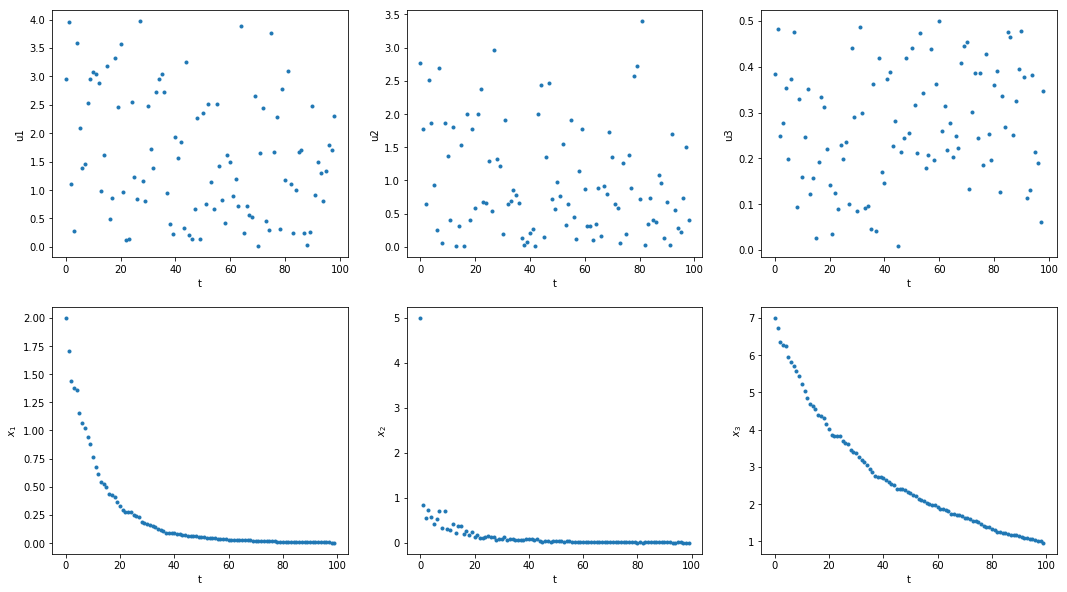

Approximate 378.2417655310663   Presize =  258.3393   Error =  -119.9024655310663
work time :     11.33


In [78]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(10, a.N_step, 5, 5, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

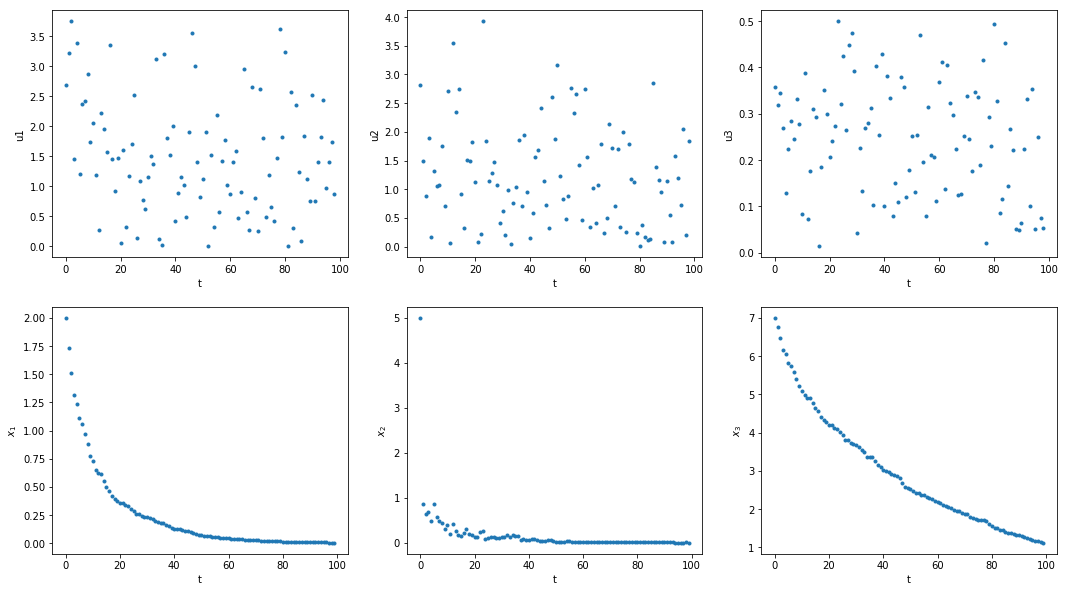

Approximate 380.4008294594914   Presize =  258.3393   Error =  -122.0615294594914
work time :     44.15


In [83]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 10, 7, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

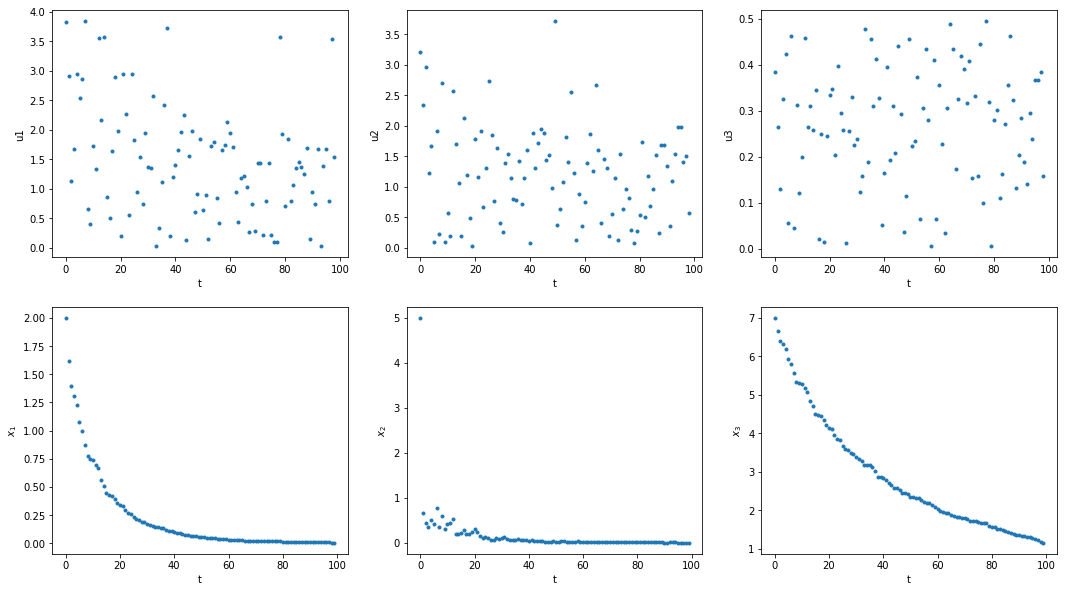

Approximate 369.58109783610206   Presize =  258.3393   Error =  -111.24179783610208
work time :     66.63


In [84]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

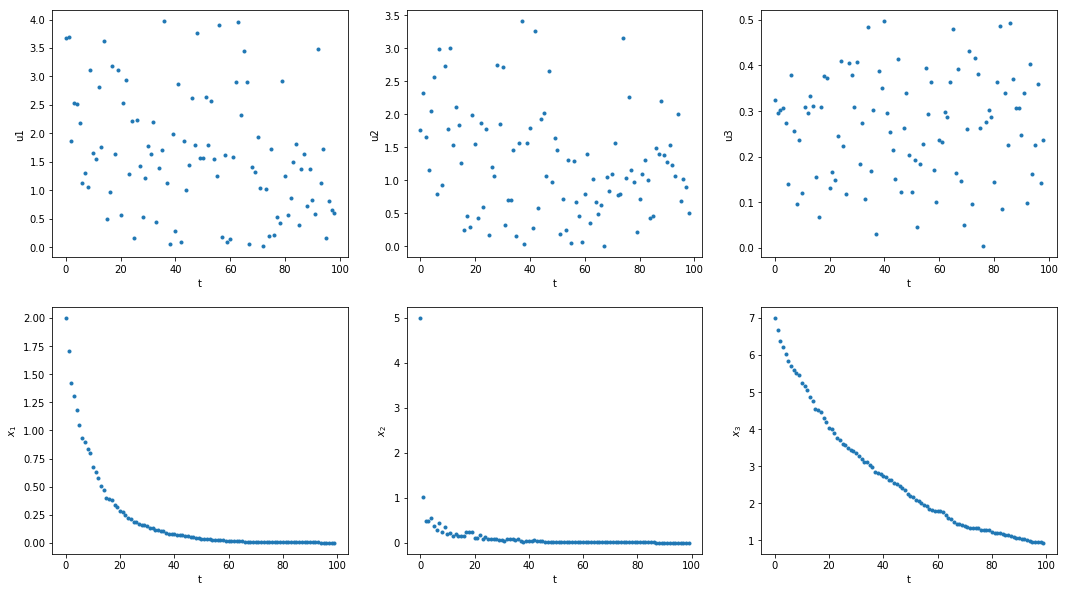

Approximate 372.01419702004216   Presize =  258.3393   Error =  -113.67489702004218
work time :     89.54


In [85]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 10, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

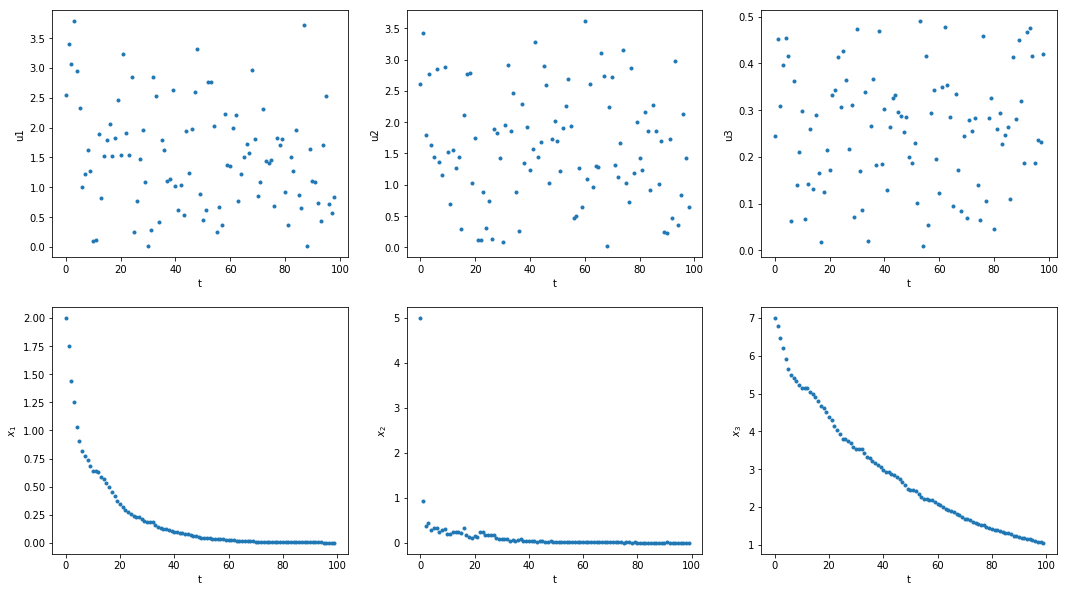

Approximate 385.46578176287426   Presize =  258.3393   Error =  -127.12648176287428
work time :     89.59


In [86]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 10, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

## Подбор параметров

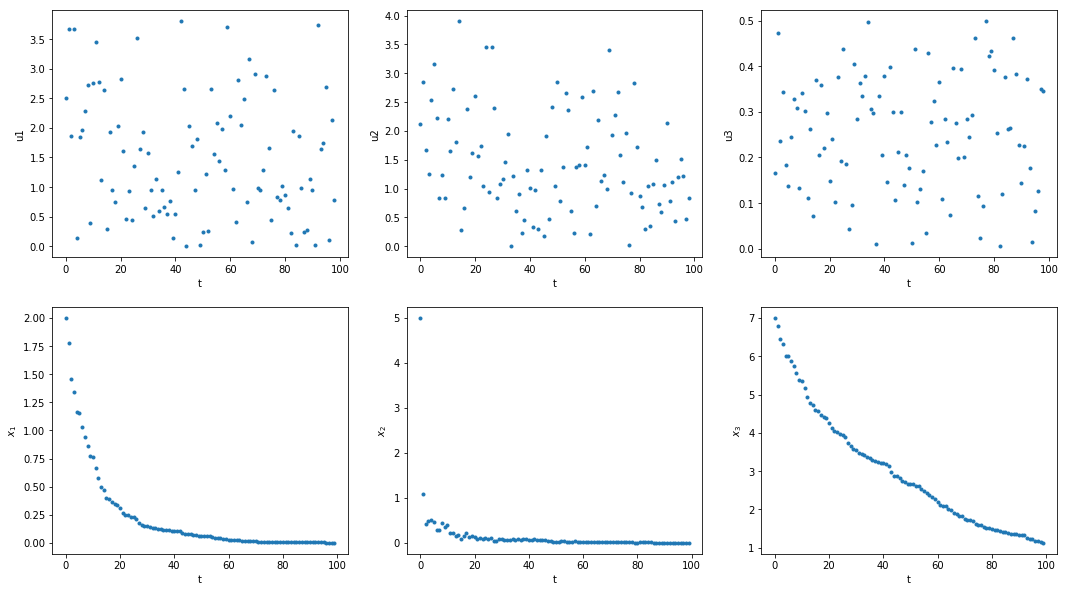

Approximate 387.2938097283263   Presize =  258.3393   Error =  -128.95450972832634
work time :     70.23


In [87]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 1, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

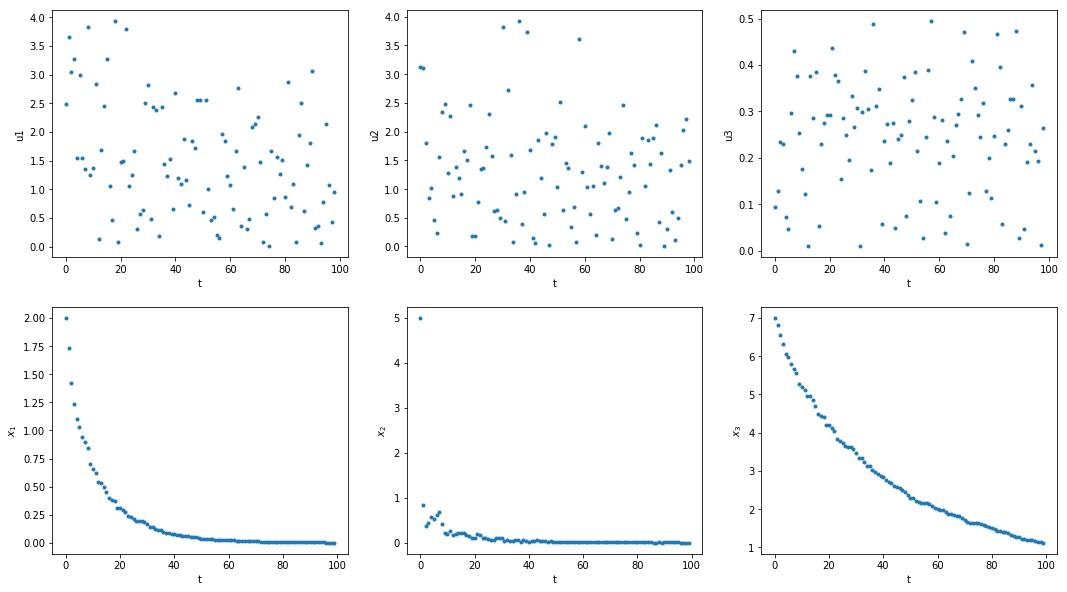

Approximate 368.9839549794373   Presize =  258.3393   Error =  -110.64465497943735
work time :     23.61


In [90]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 1, 0.1, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

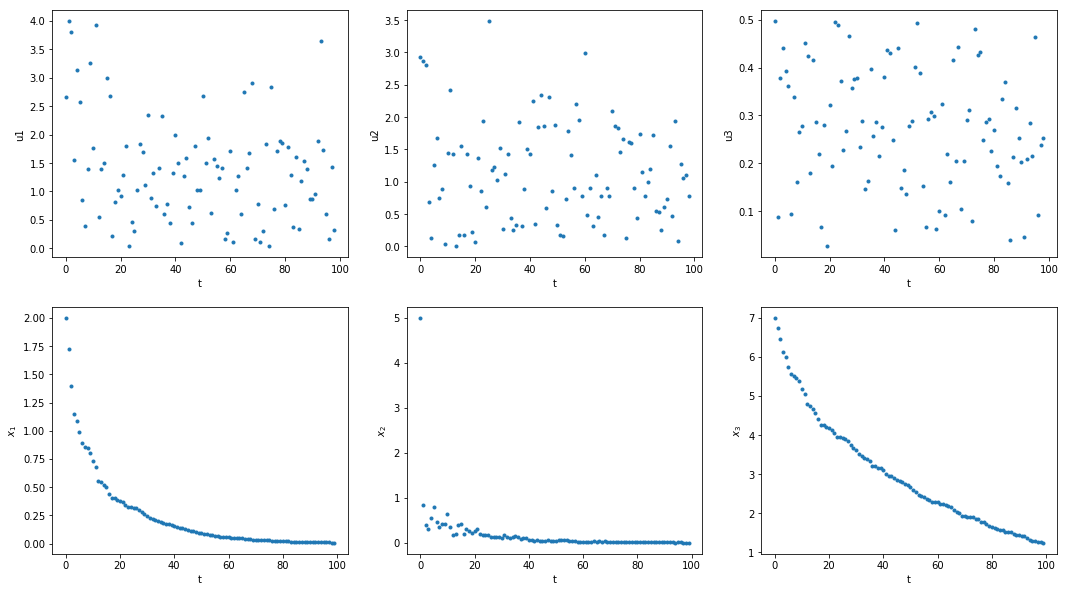

Approximate 368.8527197290089   Presize =  258.3393   Error =  -110.51341972900894
work time :     74.06


In [92]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 1, 0.9, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

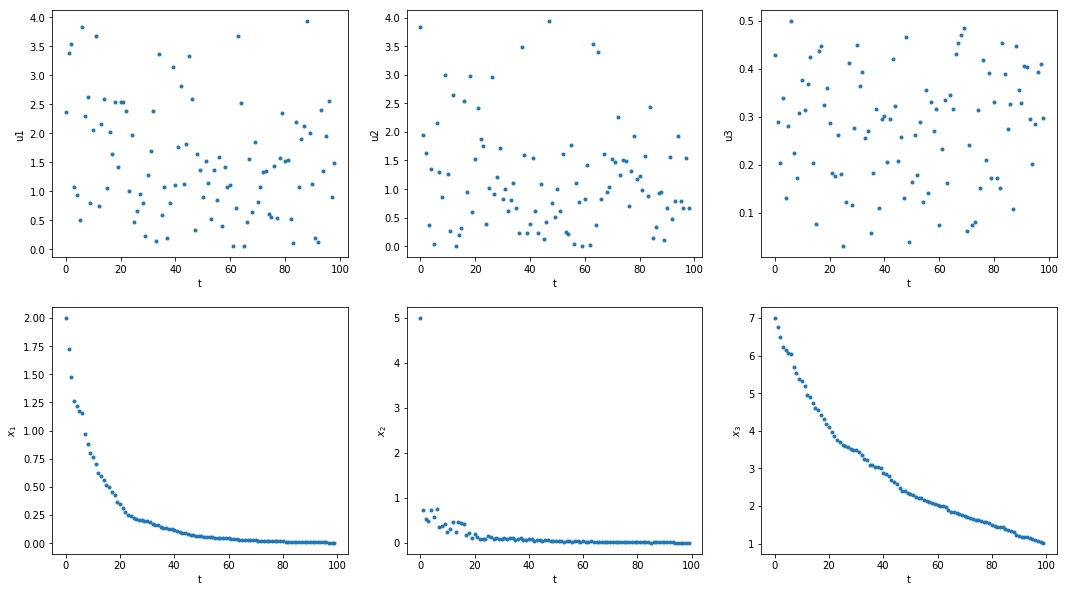

Approximate 385.04730244166876   Presize =  258.3393   Error =  -126.70800244166878
work time :     71.83


In [94]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(15, a.N_step, 15, 7, 15, 50, 0.2, 0.5, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Увеличим число особей в стае на 5:

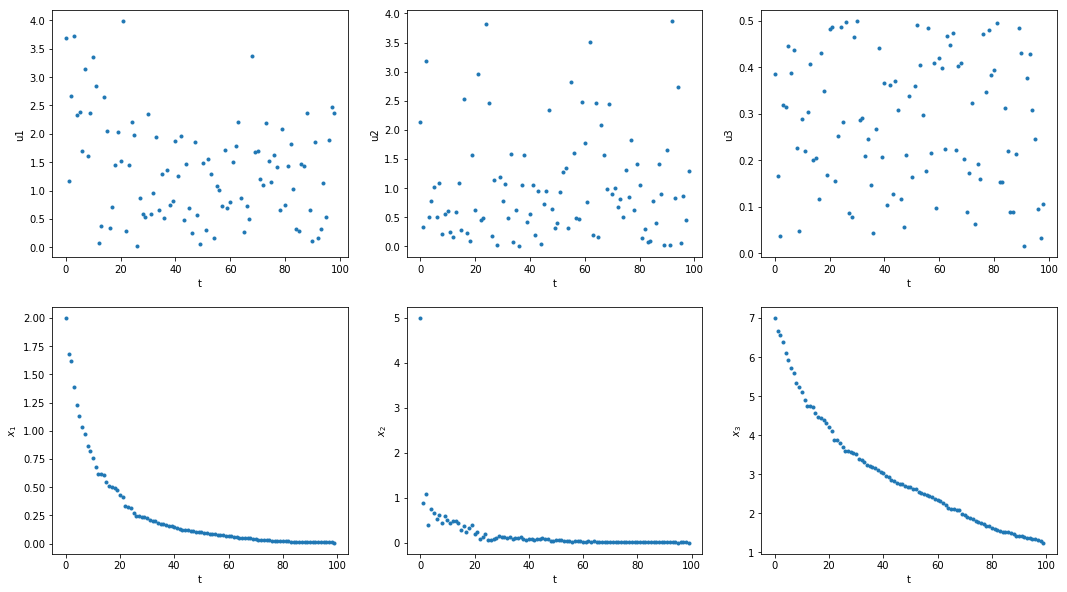

Approximate 385.1159682014044   Presize =  258.3393   Error =  -126.77666820140445
work time :     99.29


In [97]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(20, a.N_step, 15, 7, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Видно, что при небольшом увеличении числа особей время работы алгоритма возросло в 1.3 раза
# Увеличим количество внешних итераций. Очевидно, время возрастет еще сильнее

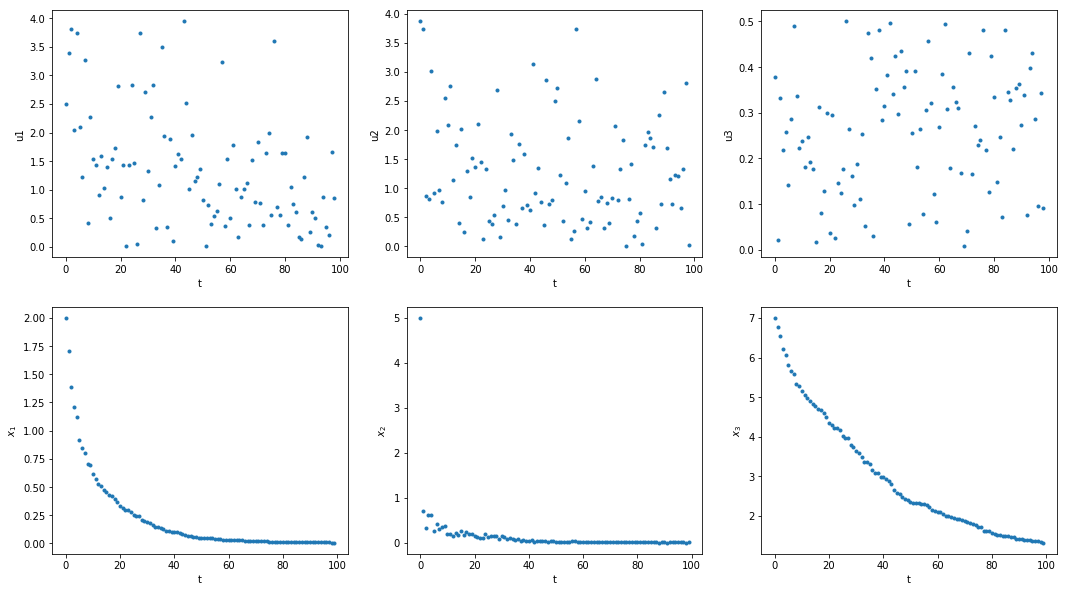

Approximate 368.1092089518231   Presize =  258.3393   Error =  -109.76990895182314
work time :    134.70


In [98]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(20, a.N_step, 15, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Продолжаем увеличивать число особей и итераций циклов

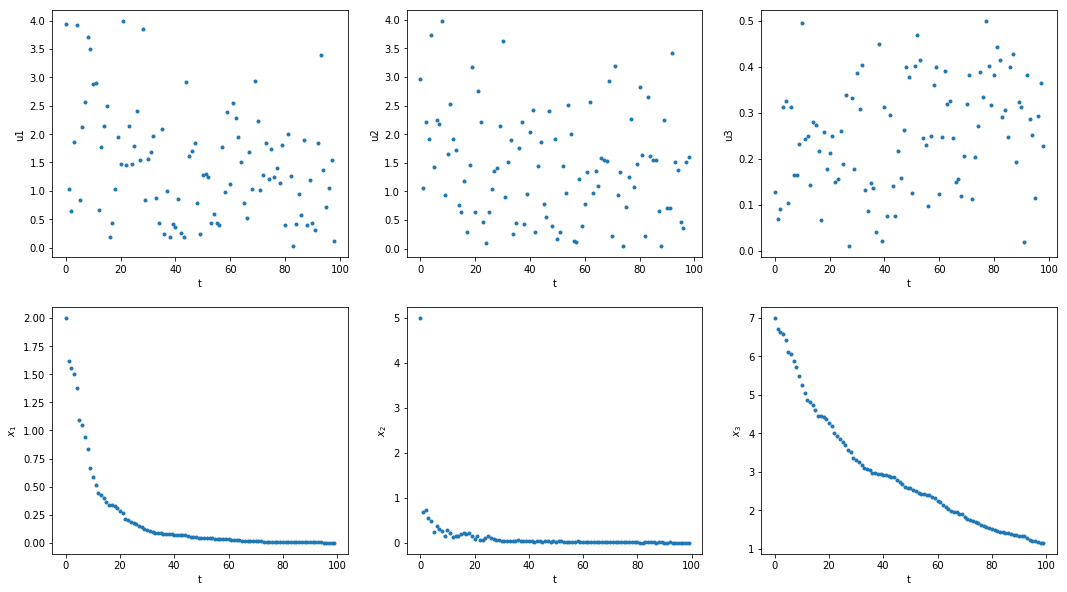

Approximate 379.2305566876125   Presize =  258.3393   Error =  -120.8912566876125
work time :    185.22


In [99]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(25, a.N_step, 17, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Результат изменился несильно. Не отчаиваемся, продолжаем анализ.

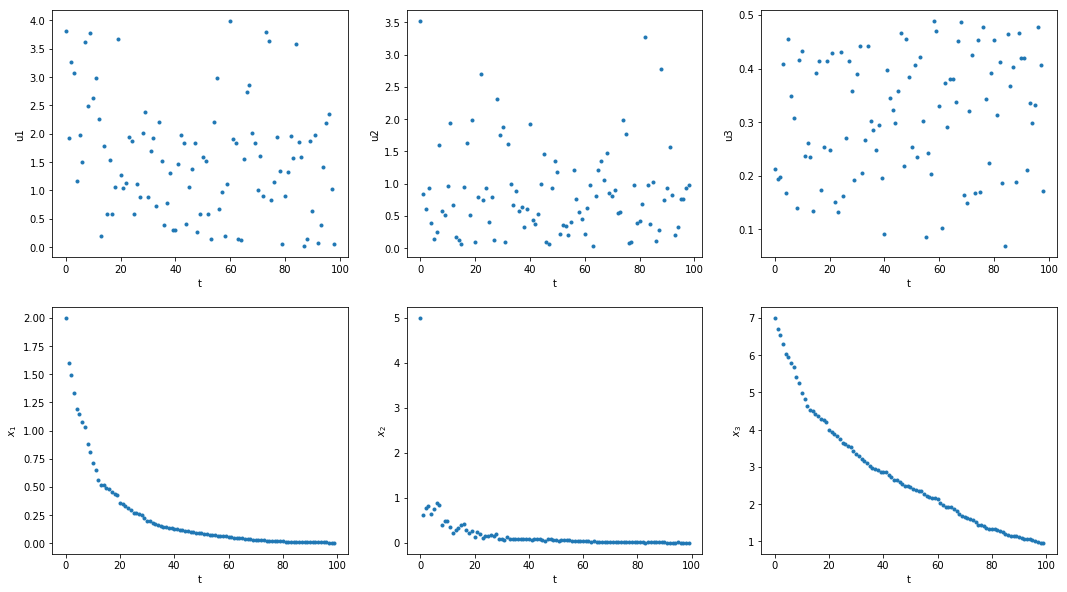

Approximate 379.3183363106706   Presize =  258.3393   Error =  -120.97903631067061
work time :    269.14


In [100]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(30, a.N_step, 20, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Пока что увеличилось только время работы программы. Точноть разве что ухудшилась на десятую.

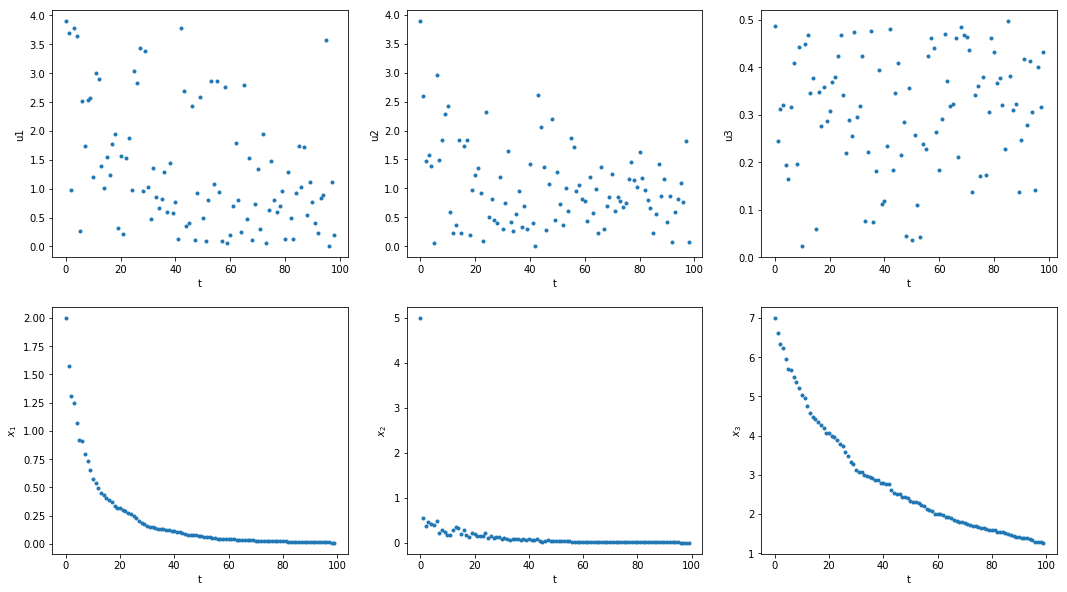

Approximate 354.92513553723614   Presize =  258.3393   Error =  -96.58583553723616
work time :    696.06


In [101]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(40, a.N_step, 25, 15, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

# Время возрасло в 3 раза, при этом точной улучшилась в 1.3 раза
Увеличим число особей с 40 до 50, число внешних итераций с 15 до 17, уменьшим минимальную область в 10 раз

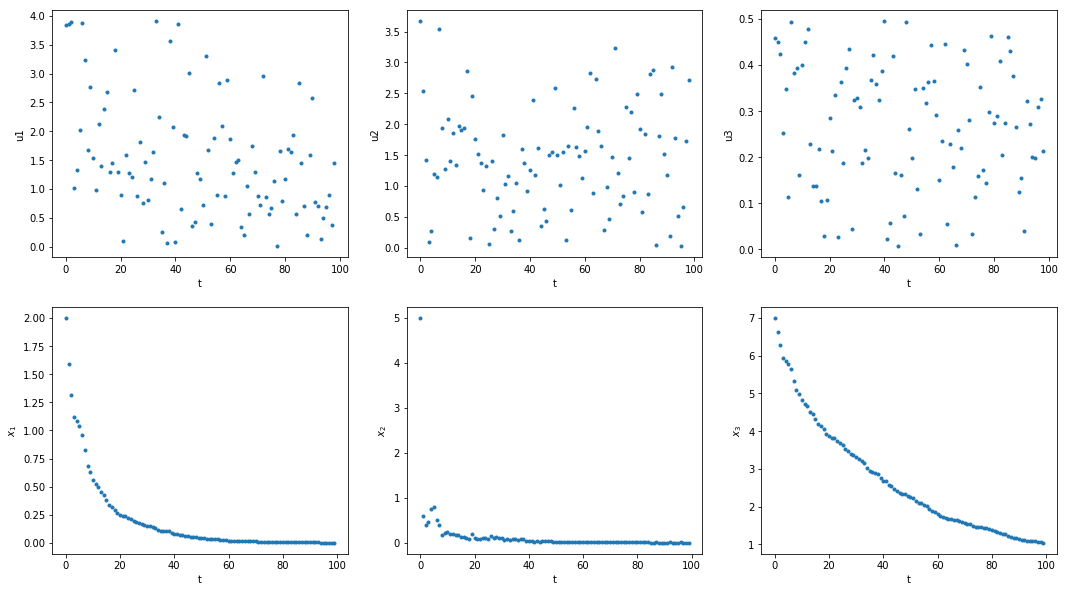

Approximate 366.91649571760865   Presize =  258.3393   Error =  -108.57719571760867
work time :    883.79


In [102]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(50, a.N_step, 25, 16, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm.work(a)

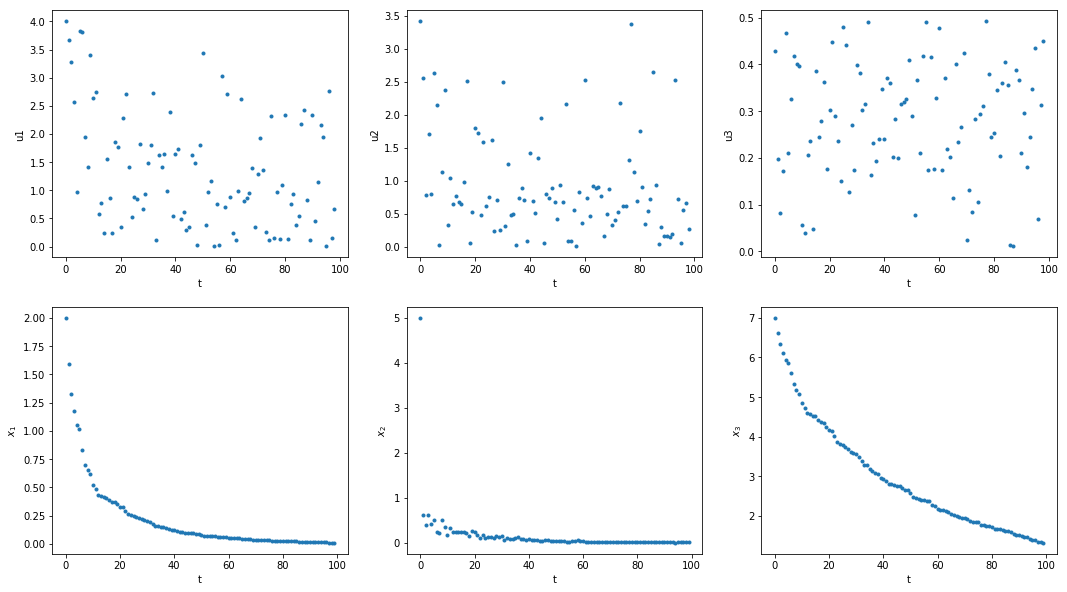

Approximate 349.4265807506715   Presize =  258.3393   Error =  -91.08728075067154
work time :   1190.36


In [103]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(70, a.N_step, 25, 15, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm.work(a)

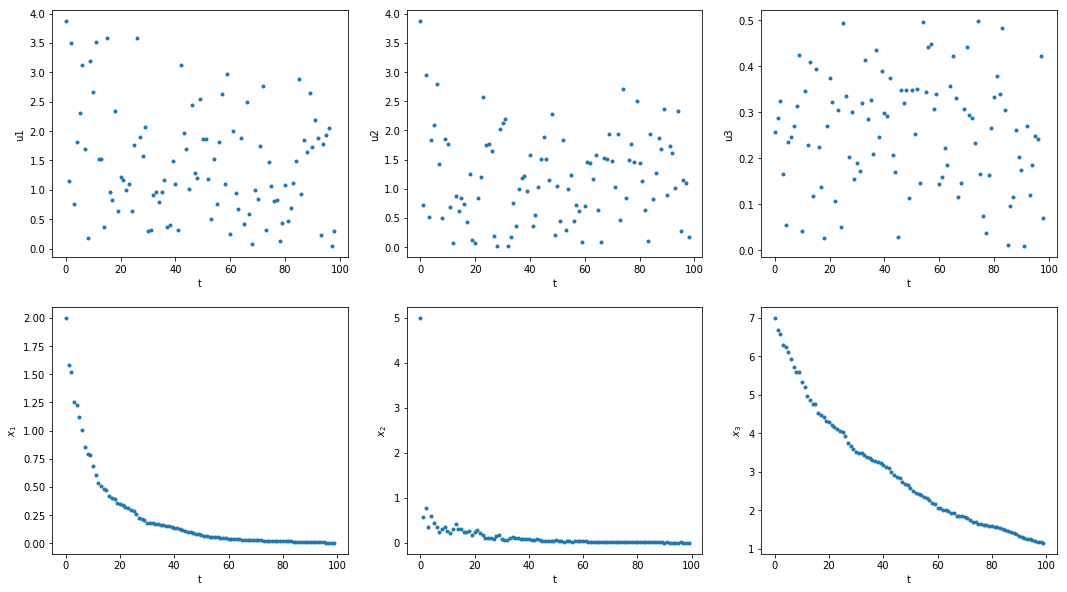

Approximate 369.61476453548016   Presize =  258.3393   Error =  -111.27546453548018
work time :   1488.90


In [104]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(80, a.N_step, 25, 15, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm.work(a)

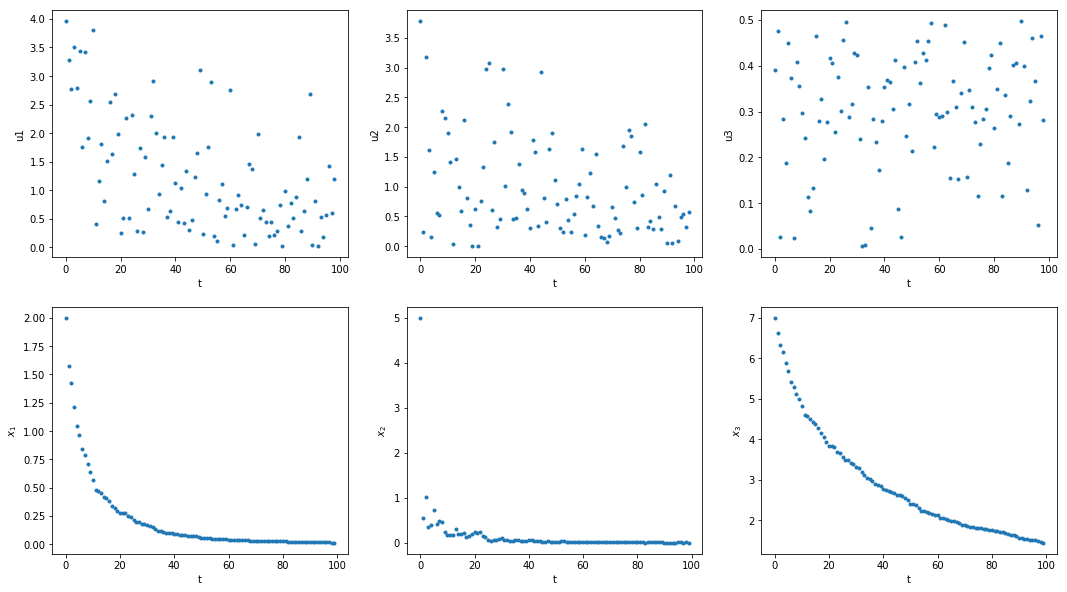

Approximate 352.1929507033545   Presize =  258.3393   Error =  -93.8536507033545
work time :   1702.36


In [106]:
a = LuusTassonTask(100)
algorithm = SparrowSwarm(80, a.N_step, 25, 20, 15, 50, 0.2, 0.2, 0.81, 0.89, 1.3, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm.work(a)

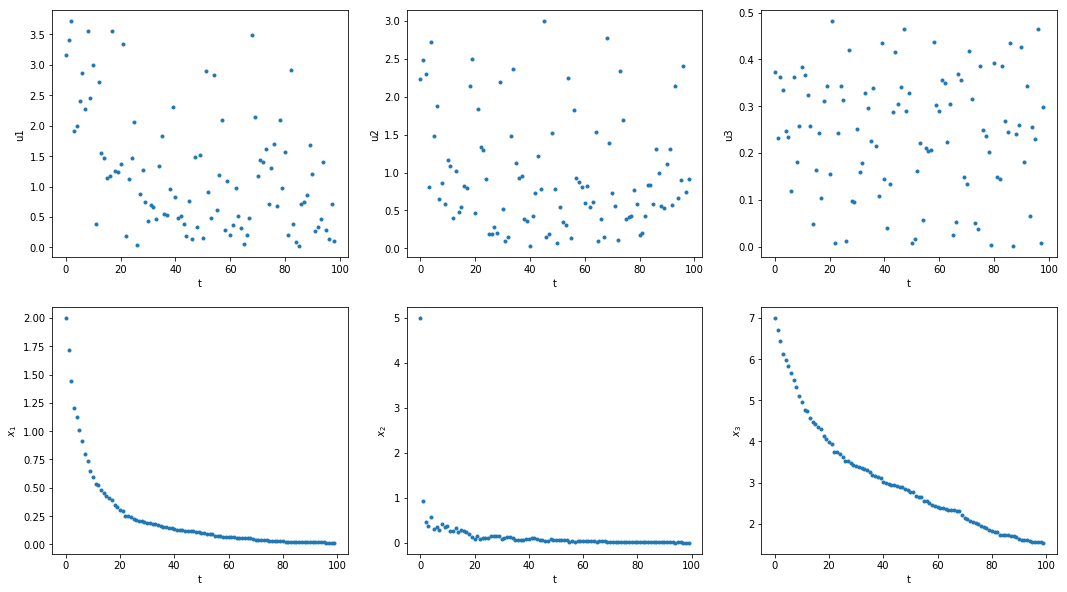

Approximate 342.2888869208966   Presize =  258.3393   Error =  -83.94958692089659
work time :    992.78


In [4]:
a_ = LuusTassonTask(100)
algorithm_ = SparrowSwarm(200, a_.N_step, 10, 10, 15, 50, 0.2, 0.2, 0.81, 0.89, 1.3, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm_.work(a_)

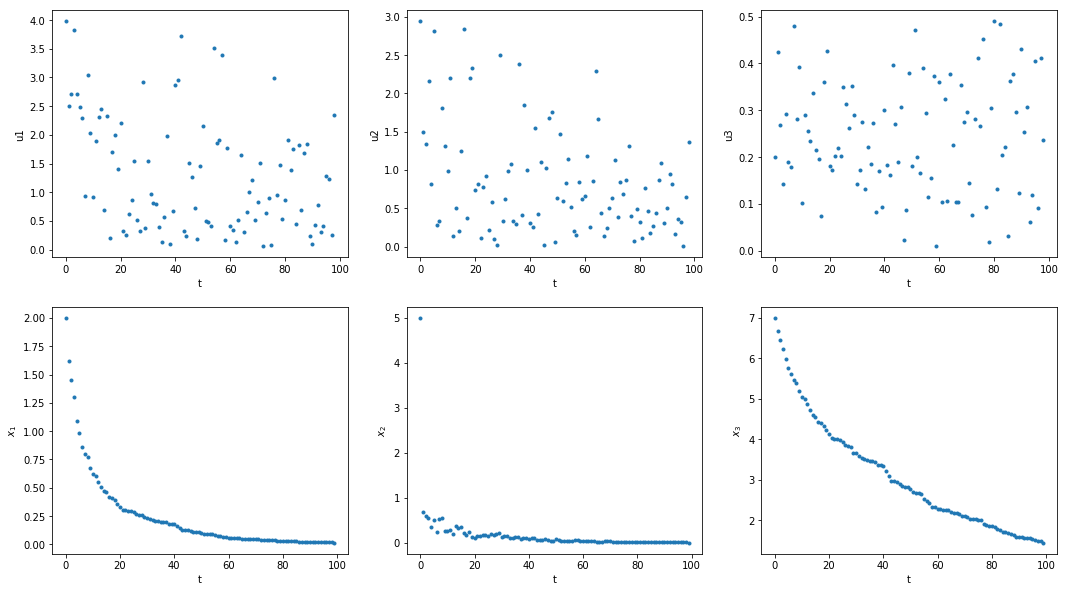

Approximate 346.6690237411263   Presize =  258.3393   Error =  -88.32972374112632
work time :   7610.07


In [6]:
a_1 = LuusTassonTask(100)
algorithm_1 = SparrowSwarm(600, a_1.N_step, 15, 15, 15, 50, 0.2, 0.2, 0.81, 0.89, 1.3, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm_1.work(a_1)

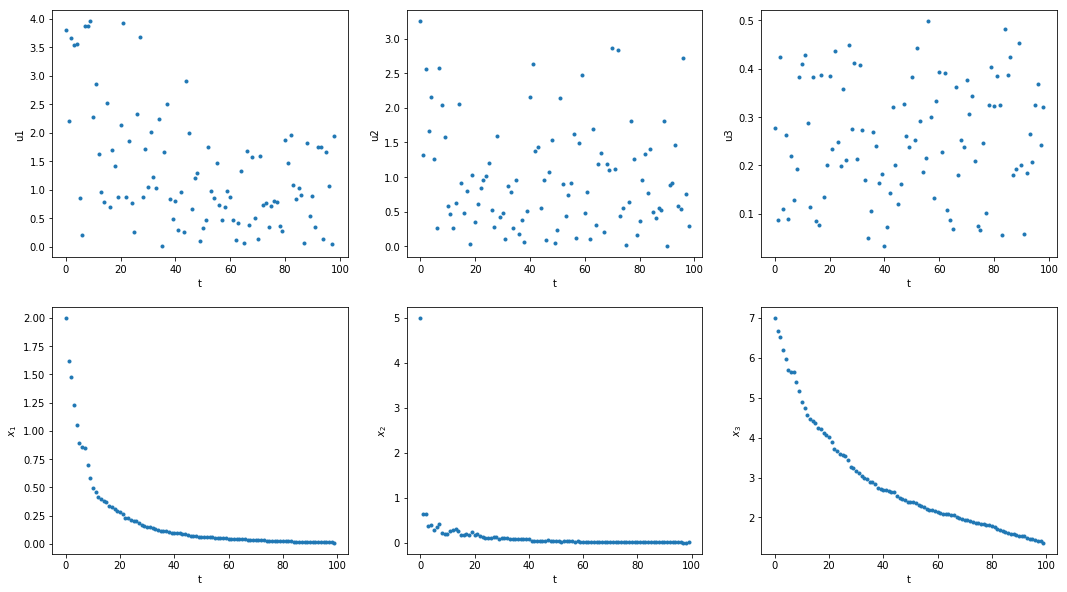

Approximate 336.3245171168502   Presize =  258.3393   Error =  -77.98521711685021
work time :  31900.90


In [9]:
a_2 = LuusTassonTask(100)
algorithm_2 = SparrowSwarm(800, a_2.N_step, 30, 25, 15, 50, 0.2, 0.2, 0.81, 0.89, 1.3, 0.5, 0.6, 0.5, 0.000001, 1)
algorithm_2.work(a_2)

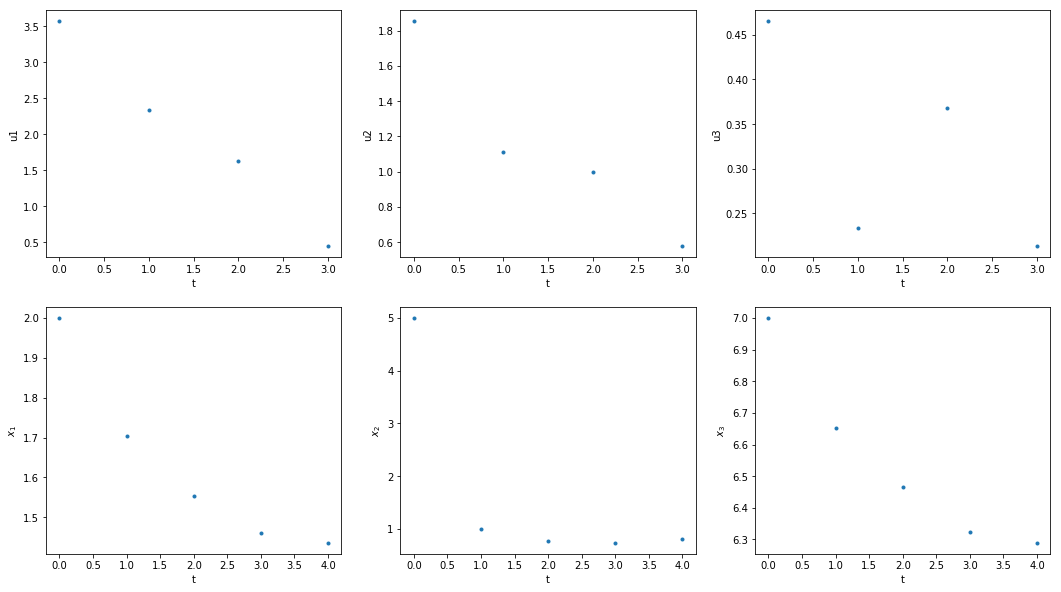

Approximate 137.44081955417187
work time :     18.73


In [5]:
a = LuusTassonTask(5)
algorithm = SparrowSwarm(30, a.N_step, 20, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

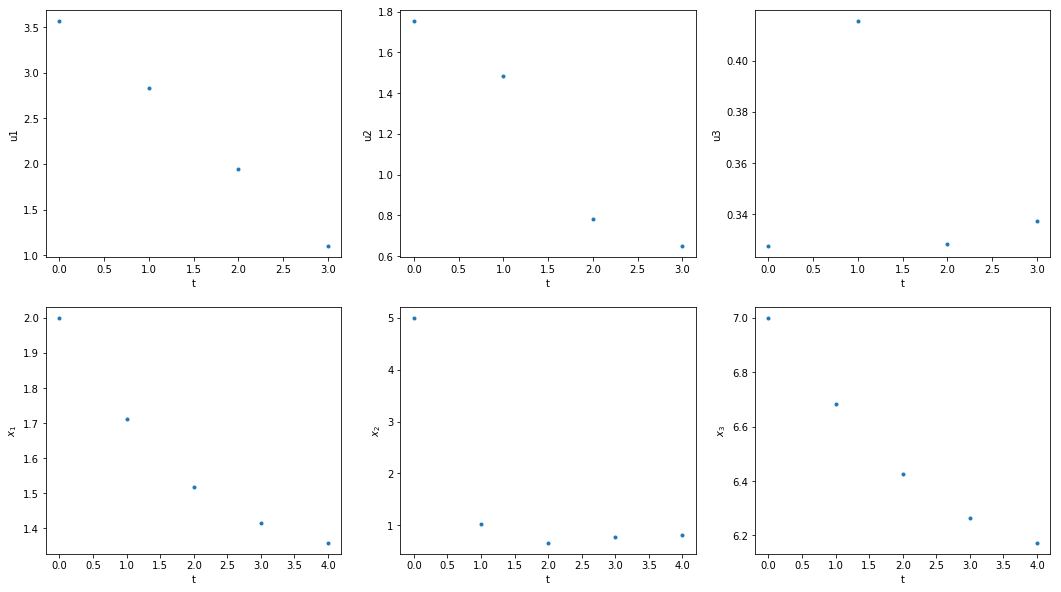

Approximate 137.37577175879122
work time :     17.94


In [6]:
a = LuusTassonTask(5)
algorithm = SparrowSwarm(30, a.N_step, 20, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

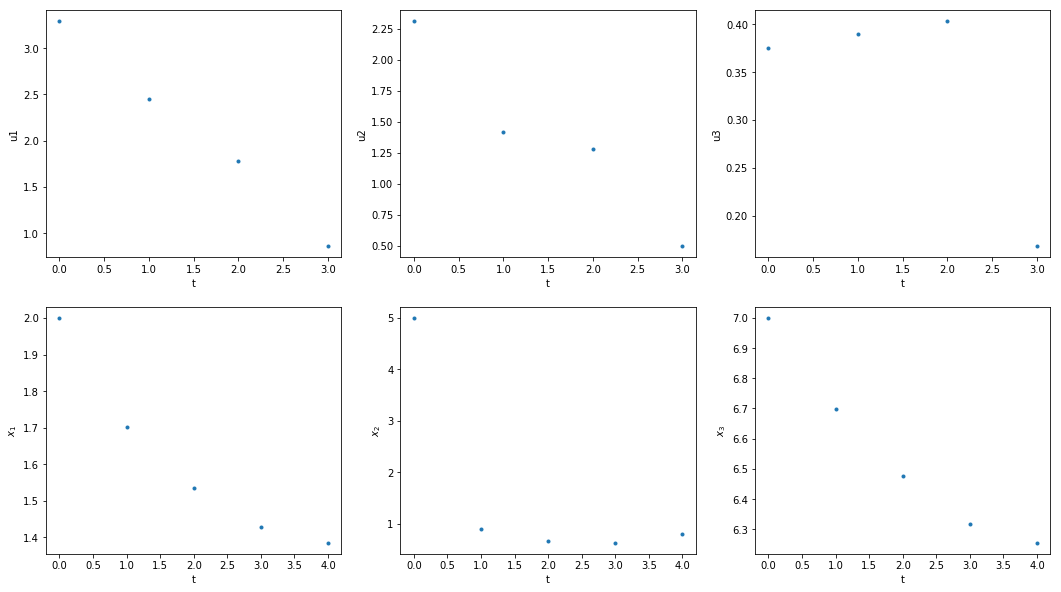

Approximate 137.45528938905798
work time :     18.74


In [7]:
a = LuusTassonTask(5)
algorithm = SparrowSwarm(30, a.N_step, 20, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

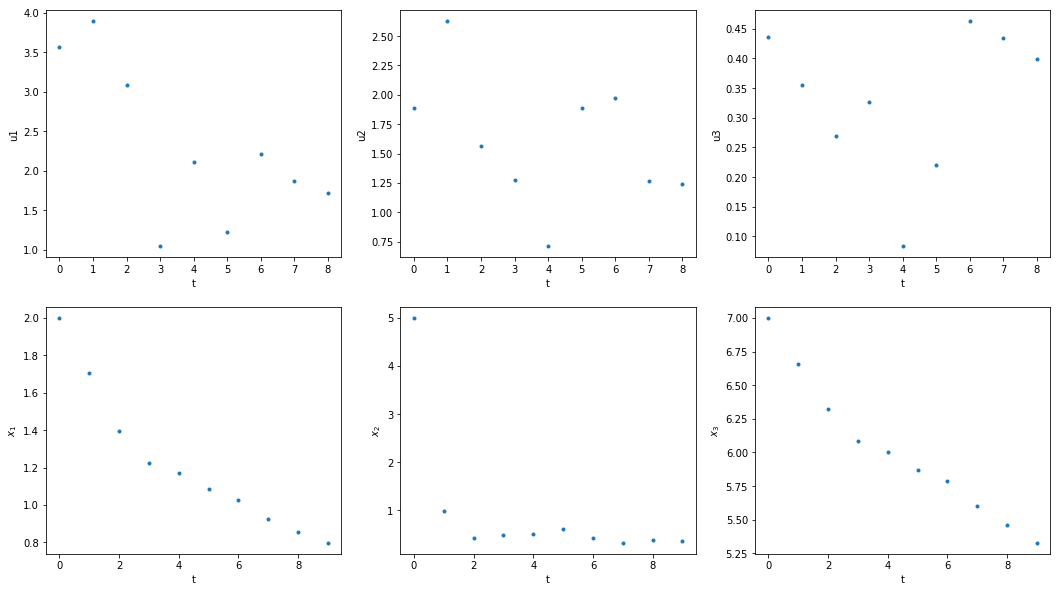

Approximate 179.18793593186248
work time :     32.21


In [8]:
a = LuusTassonTask(10)
algorithm = SparrowSwarm(30, a.N_step, 20, 10, 10, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

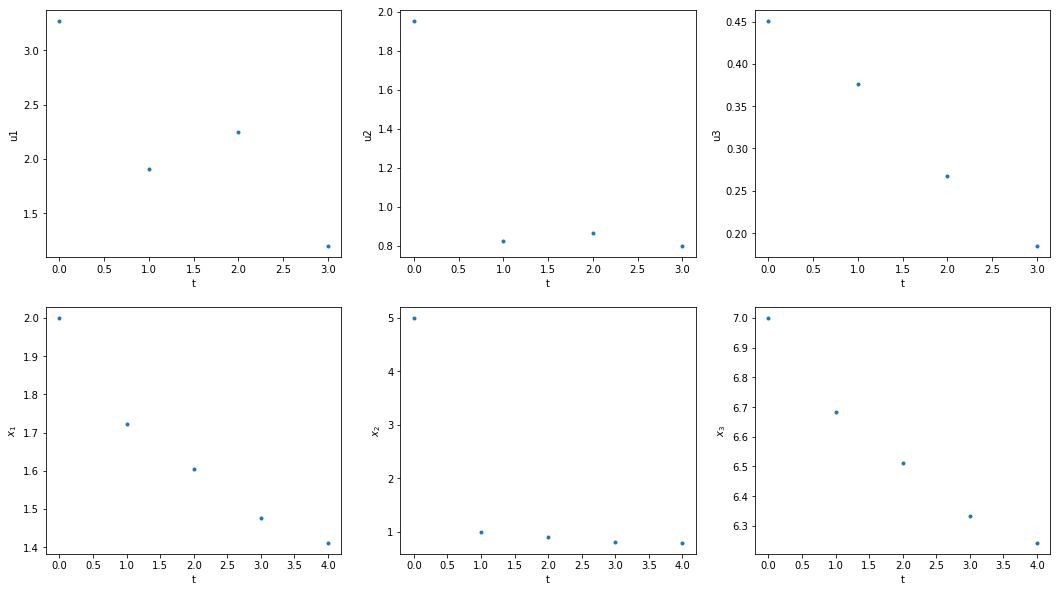

Approximate 137.53613808267588
work time :     17.46


In [9]:
a = LuusTassonTask(5)
algorithm = SparrowSwarm(30, a.N_step, 20, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

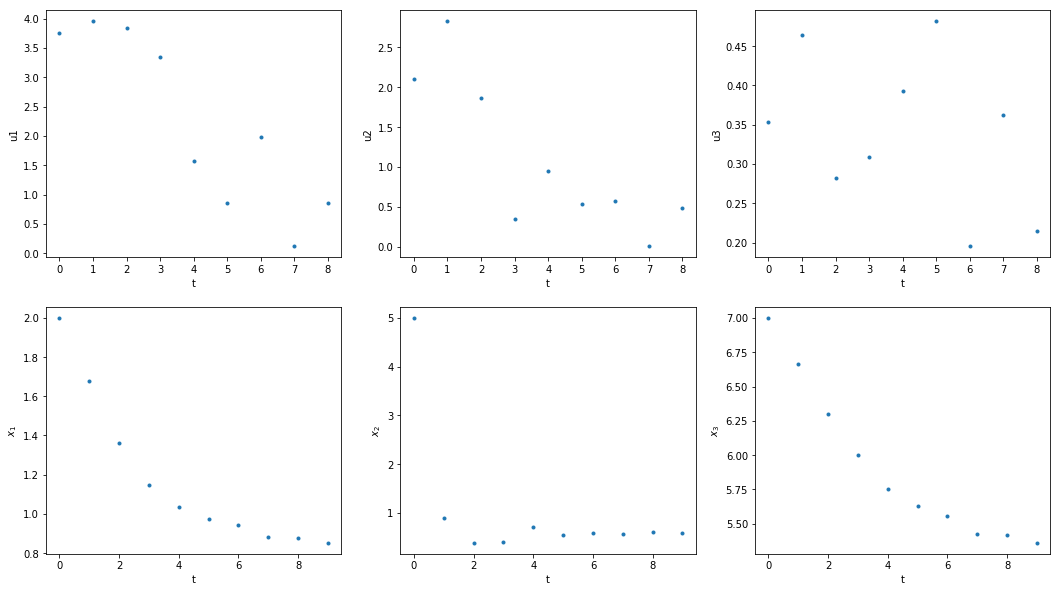

Approximate 177.08352592258115
work time :     27.08


In [10]:
a = LuusTassonTask(10)
algorithm = SparrowSwarm(35, a.N_step, 20, 10, 10, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

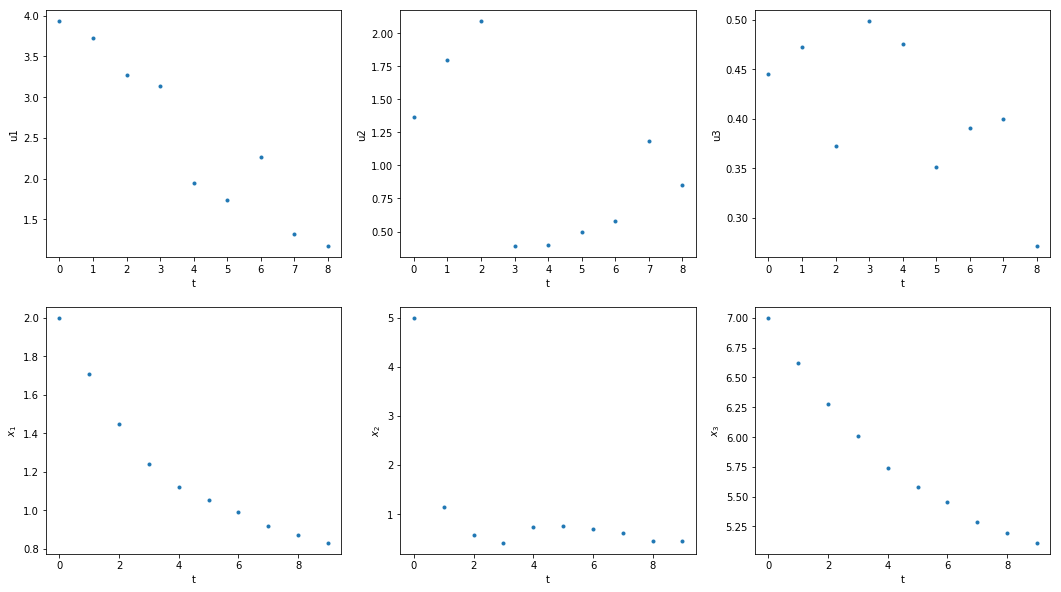

Approximate 176.79592267021604
work time :     16.69


In [11]:
a = LuusTassonTask(10)
algorithm = SparrowSwarm(40, a.N_step, 10, 10, 10, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)

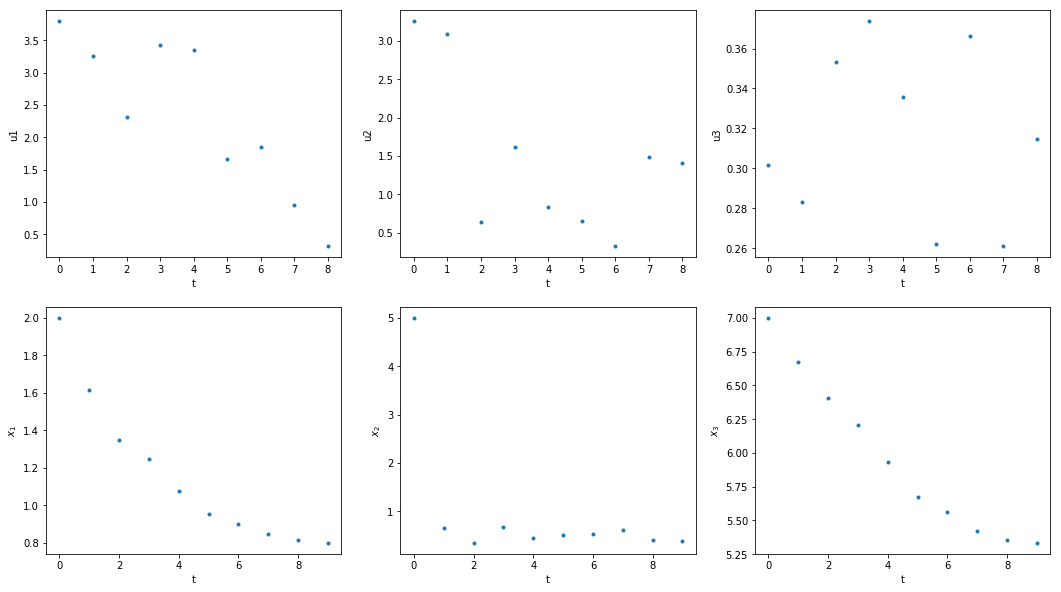

Approximate 177.55910859538423
work time :     26.90


In [12]:
a = LuusTassonTask(10)
algorithm = SparrowSwarm(45, a.N_step, 10, 10, 15, 50, 0.2, 0.2, 0.75, 0.89, 1.5, 0.5, 0.6, 0.5, 0.00001, 1)
algorithm.work(a)